## Classifying the quality of wine using different classifier algorithms

#### Importing the necessary libraries and the data

In [244]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sb

In [245]:
data=pd.read_csv('C:/Users/Vivek/Downloads/winequality-white.csv', sep=';')
data.shape

(4898, 12)

In [246]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [247]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


#### The Wine Quality Dataset involves predicting the quality of white wines on a scale given chemical measures of each wine. There are 4,898 observations with 11 input variables and one output variable. The variable names are as follows:                                                  Fixed acidity.                                                                                                                                                                                                   Volatile acidity.                                                                                                                                                                                                   Citric acid.                                                                                                                                                                                                     Residual sugar.                                                                                                                                                                                                            Chlorides.                                                                                                                                                                                                                    Free sulfur dioxide.                                                                                                                                                                                            Total sulfur dioxide.                                                                                                                                                                                       Density.                                                                                                                                                                                                                        pH.                                                                                                                                                                                                                               Sulphates.                                                                                                                                                                                                                    Alcohol.                                                                                                                                                                                                            Quality (score between 0 and 10)

In [248]:
pd.unique(data['quality'])

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [249]:
data['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

#### We can see that there are 7 ratings for the wine quality and we will consider the ones with 7 or greater as good quality and the rest as bad

In [250]:
def isGood(quality):
     if quality >= 7:
        return 1
     else:
        return 0
    
data['quality']=data['quality'].apply(isGood)

In [251]:
data['quality'].value_counts()

0    3838
1    1060
Name: quality, dtype: int64

quality
0    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
1    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
dtype: object

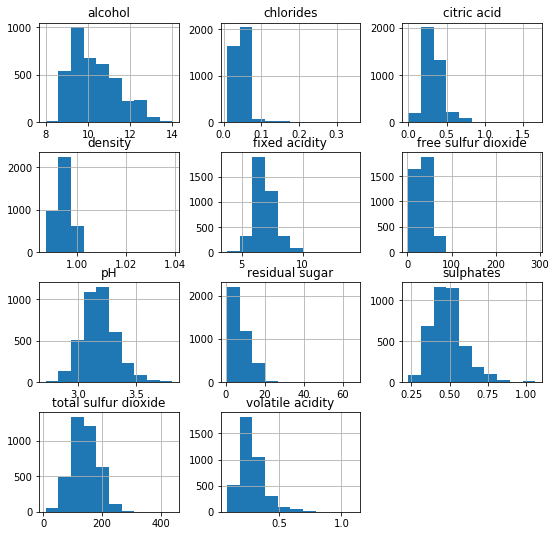

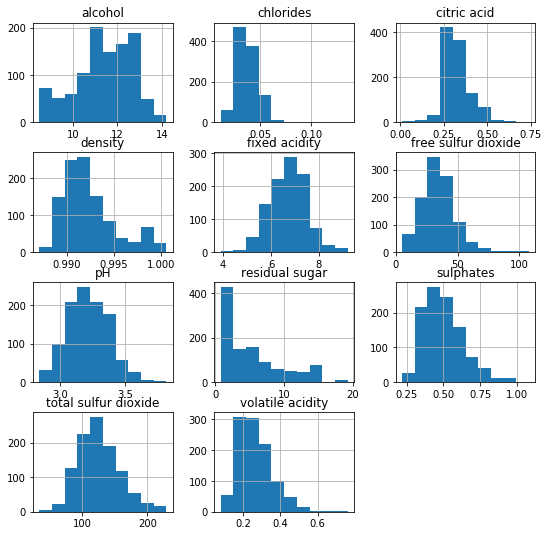

In [252]:
data.groupby('quality').hist(figsize=(9,9))

#### The graphs above show the values of the features of the wine with respect to the quality and we observe that the alcohol content is greater,density is higher and chloride is more for good quality of wine

#### Divide the data into train and test

In [253]:
X = data.drop(['quality'], axis = 1)
y = data['quality']

In [254]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20)

## Using SVM

In [255]:
from sklearn.svm import SVC
svclassifier=SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [256]:
y_pred= svclassifier.predict(X_test)

In [257]:
from sklearn.metrics import accuracy_score
print('Accuracy score:', accuracy_score(y_test,y_pred))

Accuracy score: 0.7989795918367347


In [258]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[783   0]
 [197   0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       783
           1       0.00      0.00      0.00       197

   micro avg       0.80      0.80      0.80       980
   macro avg       0.40      0.50      0.44       980
weighted avg       0.64      0.80      0.71       980



C:\Users\Vivek\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Vivek\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Vivek\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Using Random Forest

In [259]:
from sklearn.ensemble import RandomForestClassifier
#create Gaussian classifier
clf=RandomForestClassifier(n_estimators=100)
#train the model
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [260]:
from sklearn import metrics
print('Accuracy score:', metrics.accuracy_score(y_test,y_pred))

Accuracy score: 0.8775510204081632


In [261]:
feature_imp=pd.Series(clf.feature_importances_, index=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol',]).sort_values(ascending=False)
feature_imp

alcohol                 0.153002
density                 0.124945
chlorides               0.089036
residual sugar          0.088156
pH                      0.085800
free sulfur dioxide     0.085241
volatile acidity        0.084301
total sulfur dioxide    0.081130
sulphates               0.073954
citric acid             0.069573
fixed acidity           0.064861
dtype: float64

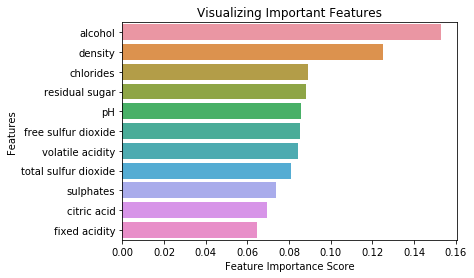

In [262]:
sb.barplot(x=feature_imp, y=feature_imp.index)
plt.title('Visualizing Important Features')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

In [263]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[746  37]
 [ 83 114]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       783
           1       0.75      0.58      0.66       197

   micro avg       0.88      0.88      0.88       980
   macro avg       0.83      0.77      0.79       980
weighted avg       0.87      0.88      0.87       980



## Using Decision Tree

In [264]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [265]:
y_pred=classifier.predict(X_test)

In [266]:
from sklearn import metrics
print('Accuracy score:', metrics.accuracy_score(y_test,y_pred))

Accuracy score: 0.8173469387755102


In [267]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[685  98]
 [ 81 116]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       783
           1       0.54      0.59      0.56       197

   micro avg       0.82      0.82      0.82       980
   macro avg       0.72      0.73      0.72       980
weighted avg       0.82      0.82      0.82       980



### We can observe that the accuracy scores are as follows
### SVM - 79%
### Random Forest - 87%
### Decision Tree - 81%
### Hence we can conclude that Random Forest is the best classifier method for this dataset